### Proceso de extracción, transformación y limpieza de los datos (ETL) de la base de datos de juegos

Para comenzar, se importan las librerías necesarias. 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import re

Se carga el archivo.

In [3]:
juegos_steam= 'Archivos crudos\output_steam_games.json'
df_juegos=pd.read_json(juegos_steam, lines=True)
print (df_juegos)

              publisher                                 genres  \
0                  None                                   None   
1                  None                                   None   
2                  None                                   None   
3                  None                                   None   
4                  None                                   None   
...                 ...                                    ...   
120440  Ghost_RUS Games  [Casual, Indie, Simulation, Strategy]   
120441           Sacada              [Casual, Indie, Strategy]   
120442     Laush Studio            [Indie, Racing, Simulation]   
120443         SIXNAILS                        [Casual, Indie]   
120444             None                                   None   

                        app_name                     title  \
0                           None                      None   
1                           None                      None   
2                    

De la información que observo en el dataframe, y considerando las instrucciones suministradas, no considero de utilidad las columnas 'url' y 'reviews_url', por lo que no las cargaré.

In [4]:
df_juegos=df_juegos[['publisher', 'genres', 'app_name', 'title', 'id', 'release_date', 'tags', 'specs', 'price', 'early_access', 'developer' ]]
print (df_juegos)

              publisher                                 genres  \
0                  None                                   None   
1                  None                                   None   
2                  None                                   None   
3                  None                                   None   
4                  None                                   None   
...                 ...                                    ...   
120440  Ghost_RUS Games  [Casual, Indie, Simulation, Strategy]   
120441           Sacada              [Casual, Indie, Strategy]   
120442     Laush Studio            [Indie, Racing, Simulation]   
120443         SIXNAILS                        [Casual, Indie]   
120444             None                                   None   

                        app_name                     title        id  \
0                           None                      None       NaN   
1                           None                      None     

Visualizo las tres primeras líneas del dataframe

In [5]:
df_juegos.head(3)

,publisher,genres,app_name,title,id,release_date,tags,specs,price,early_access,developer
0,None,None,None,None,NaN,None,None,None,None,NaN,None
1,None,None,None,None,NaN,None,None,None,None,NaN,None
2,None,None,None,None,NaN,None,None,None,None,NaN,None


### Observo la distribución de los datos para entender mejor el dataframe y evaluar la calidad de los datos.

Primero, veo la cantidad de valores nulos en el dataframe

In [6]:
df_juegos.isna().sum()

publisher       96362
genres          91593
app_name        88312
title           90360
id              88312
release_date    90377
tags            88473
specs           88980
price           89687
early_access    88310
developer       91609
dtype: int64

Luego, observo la longitud del dataframe

In [7]:
len(df_juegos)

120445

Para entender mejor la distribución de los datos, calculo el porcentaje de valores nulos respecto a la totalidad de los datos

In [8]:
df_juegos.isna().sum()*100/len(df_juegos)

publisher       80.004982
genres          76.045498
app_name        73.321433
title           75.021794
id              73.321433
release_date    75.035909
tags            73.455104
specs           73.876043
price           74.463033
early_access    73.319773
developer       76.058782
dtype: float64

El dataframe tiene una baja calidad de los datos, ya que para algunas columnas existe un 80% de valores nulos. Para comprender mejor la manera en la que se distribuyen los datos nulos, se hace un gráfico de calor empleando seaborn. Aprovecho para ajustar el colormap del gráfico para mejor comprensión. 

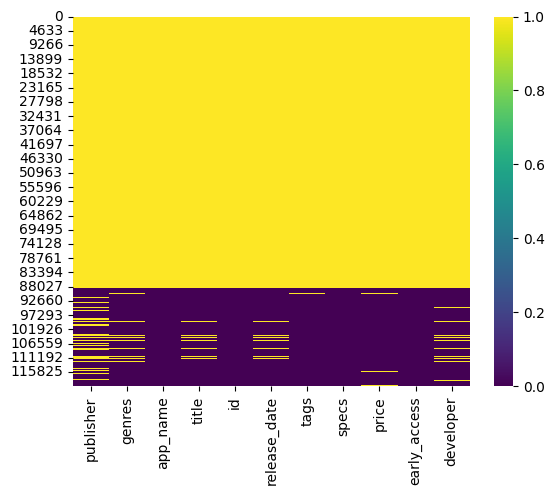

In [9]:
sns.heatmap(df_juegos.isna(), cmap='viridis');

Procedo a la eliminación de las filas con valores nulos, al evidenciarse que su eliminación no compromete la integridad de los datos.

In [10]:
df_juegos.dropna(how='all', inplace=True)
df_juegos.head(3)

,publisher,genres,app_name,title,id,release_date,tags,specs,price,early_access,developer
88310,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,761140.0,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],4.99,0.0,Kotoshiro
88311,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,643980.0,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...","[Single-player, Multi-player, Online Multi-Pla...",Free To Play,0.0,Secret Level SRL
88312,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,670290.0,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...","[Single-player, Multi-player, Online Multi-Pla...",Free to Play,0.0,Poolians.com


Identifico la longitud actual del dataframe.

In [11]:
len(df_juegos)

32135

El dataframe original contenía 120.445 valores, de los cuales 88.310 eran nulos. La longitud actual es de 32.135 valores.

Identifico que columnas incluyen ahora valores nulos. 

In [12]:
df_juegos.isna().sum()

publisher       8052
genres          3283
app_name           2
title           2050
id                 2
release_date    2067
tags             163
specs            670
price           1377
early_access       0
developer       3299
dtype: int64

Saco el porcentaje de valores nulos existente en el dataframe

In [13]:
df_juegos.isna().sum()*100/len(df_juegos)

publisher       25.056792
genres          10.216275
app_name         0.006224
title            6.379337
id               0.006224
release_date     6.432239
tags             0.507235
specs            2.084954
price            4.285047
early_access     0.000000
developer       10.266065
dtype: float64

Ahora la columna que más valores nulos contiene es publisher, con un 25% de valores nulos, lo que supone una mejoría de un 55% frente al porcentaje que traía inicialmente (80%)

Para tener mayor claridad respecto a la distribución de datos actuales, se realiza nuevamente un mapa de calor.

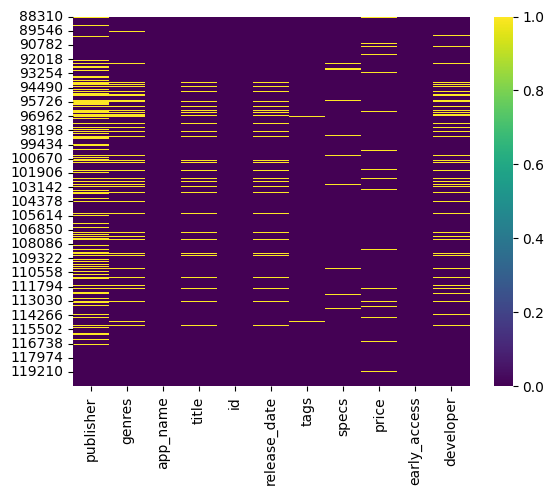

In [14]:
sns.heatmap(df_juegos.isna(), cmap='viridis');

Esto permite constatar que ahora existe una mejor calidad del dataframe, sin embargo existen datos faltantes, principalmente en las columnas 'publisher', 'genres' y 'developer'. Ahora, necesito ver como están compuestas estas columnas. 

In [15]:
df_juegos[['developer', 'publisher', 'genres']]

,developer,publisher,genres
88310,Kotoshiro,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]"
88311,Secret Level SRL,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]"
88312,Poolians.com,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]"
88313,彼岸领域,彼岸领域,"[Action, Adventure, Casual]"
88314,None,None,None
...,...,...,...
120440,"Nikita ""Ghost_RUS""",Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]"
120441,Sacada,Sacada,"[Casual, Indie, Strategy]"
120442,Laush Dmitriy Sergeevich,Laush Studio,"[Indie, Racing, Simulation]"
120443,"xropi,stev3ns",SIXNAILS,"[Casual, Indie]"


Identifico que pese a que en ocasiones coincide el contenido de la columna 'developer' con el contenido de la columna 'publisher', no siempre sucede. Además, la columna 'genres' explica el género en el que se inserta el juego específico al que se hace referencia. 

Decido observar en qué filas el valor de 'developer' es nulo, pero no es nulo 'publisher'

In [16]:
filtro1=(df_juegos['developer'].isna())& (~df_juegos['publisher'].isna())
df_juegos[filtro1][['developer', 'publisher']]

,developer,publisher
88427,None,Retroism
88576,None,"ValuSoft, Retroism"
88614,None,Meridian4
88617,None,"ValuSoft, Retroism"
89039,None,Ubisoft
...,...,...
118602,None,Ubisoft
119297,None,SEGA
119298,None,SEGA
119299,None,SEGA


Existen 65 columnas en las que el valor de 'developer'es nulo, más no lo es 'publisher'

Decido eliminar las filas que contienen más del 55% de valores nulos, ya que no me aportan información completamente fiable.

In [17]:
limite=0.55
filtro2=df_juegos.isnull().mean(axis=1)<limite
df_juegos=df_juegos[filtro2]
df_juegos.head(5)

,publisher,genres,app_name,title,id,release_date,tags,specs,price,early_access,developer
88310,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,761140.0,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],4.99,0.0,Kotoshiro
88311,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,643980.0,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...","[Single-player, Multi-player, Online Multi-Pla...",Free To Play,0.0,Secret Level SRL
88312,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,670290.0,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...","[Single-player, Multi-player, Online Multi-Pla...",Free to Play,0.0,Poolians.com
88313,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,767400.0,2017-12-07,"[Action, Adventure, Casual]",[Single-player],0.99,0.0,彼岸领域
88314,None,None,Log Challenge,None,773570.0,None,"[Action, Indie, Casual, Sports]","[Single-player, Full controller support, HTC V...",2.99,0.0,None


Ahora visualizo la cantidad de valores nulos, su porcentaje y distribución con mapa de calor.

In [18]:
len(df_juegos)

32134

In [19]:
df_juegos.isna().sum()

publisher       8051
genres          3282
app_name           1
title           2049
id                 1
release_date    2066
tags             162
specs            669
price           1377
early_access       0
developer       3298
dtype: int64

In [20]:
df_juegos.isna().sum()*100/len(df_juegos)

publisher       25.054459
genres          10.213481
app_name         0.003112
title            6.376424
id               0.003112
release_date     6.429327
tags             0.504139
specs            2.081907
price            4.285181
early_access     0.000000
developer       10.263273
dtype: float64

Se evidencia que hubo poco cambio respecto a la verificación anterior, lo que indica que se mantiene la integridad estructural de los datos.

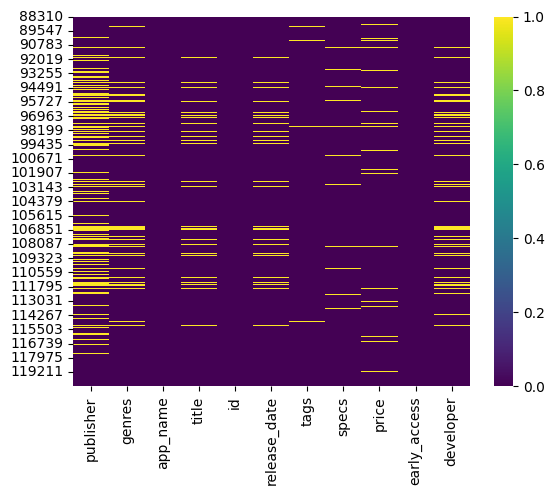

In [21]:
sns.heatmap(df_juegos.isna(),cmap='viridis');

Decido verificar si existen strings vacías en la columna 'publisher', para evitar ocurrencia de errores.

In [22]:
vacio= [[], [''], [' '], '', ' ']
df_juegos[df_juegos['publisher'].isin(vacio)]

,publisher,genres,app_name,title,id,release_date,tags,specs,price,early_access,developer


Como anteriormente se había evidenciado que en algunas ocasiones existía concurrencia de datos en la columna 'publisher' y 'developer', se completan los datos faltantes de la columna 'developer' con los datos correspondientes en 'publisher'.

In [23]:
vacio = [[], [''], [' '], '', ' ', None, np.nan]
df_juegos['developer']=df_juegos.apply(lambda row: row['publisher'] if row ['developer'] in vacio else row ['developer'], axis=1)

Se visualiza ahora las tres primeras filas de la columna 'developer' del dataframe y las últimas filas del dataframe completo para tener una idea más amplia de cómo va.

In [24]:
df_juegos['developer'].head()

88310           Kotoshiro
88311    Secret Level SRL
88312        Poolians.com
88313                彼岸领域
88314                None
Name: developer, dtype: object

In [25]:
df_juegos.tail(3)

,publisher,genres,app_name,title,id,release_date,tags,specs,price,early_access,developer
120442,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,610660.0,2018-01-04,"[Indie, Simulation, Racing]","[Single-player, Steam Achievements, Steam Trad...",1.99,0.0,Laush Dmitriy Sergeevich
120443,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,658870.0,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...","[Single-player, Steam Achievements, Steam Cloud]",4.99,0.0,"xropi,stev3ns"
120444,None,None,Maze Run VR,None,681550.0,None,"[Early Access, Adventure, Indie, Action, Simul...","[Single-player, Stats, Steam Leaderboards, HTC...",4.99,1.0,None


Se vuelve a verificar el porcentaje de valores nulos presentes en el dataframe.

In [26]:
df_juegos.isna().sum()*100/len(df_juegos)

publisher       25.054459
genres          10.213481
app_name         0.003112
title            6.376424
id               0.003112
release_date     6.429327
tags             0.504139
specs            2.081907
price            4.285181
early_access     0.000000
developer       10.060995
dtype: float64

La columna 'publisher' ha cumplido su misión en el dataframe, por lo que se procede a su eliminación.

In [27]:
df_juegos.drop(columns='publisher', inplace=True)

Se eliminan las filas con ID nulo para poder emplear los datos que son relevantes.

In [28]:
df_juegos=df_juegos[~df_juegos['id'].isna()]

Se visualiza el tipo de datos que se encuentra en cada columna y se hacen los casteos necesarios.

In [29]:
df_juegos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32133 entries, 88310 to 120444
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        28851 non-null  object 
 1   app_name      32132 non-null  object 
 2   title         30084 non-null  object 
 3   id            32133 non-null  float64
 4   release_date  30067 non-null  object 
 5   tags          31971 non-null  object 
 6   specs         31464 non-null  object 
 7   price         30756 non-null  object 
 8   early_access  32133 non-null  float64
 9   developer     28900 non-null  object 
dtypes: float64(2), object(8)
memory usage: 2.7+ MB


Se castea el tipo de las columnas ID, early access de float a integer y se verifica si se realizó la conversión.

In [30]:
df_juegos['id'] = df_juegos['id'].astype(int)

In [31]:
df_juegos['early_access']=df_juegos['id'].astype(int)

In [32]:
df_juegos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32133 entries, 88310 to 120444
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   genres        28851 non-null  object
 1   app_name      32132 non-null  object
 2   title         30084 non-null  object
 3   id            32133 non-null  int64 
 4   release_date  30067 non-null  object
 5   tags          31971 non-null  object
 6   specs         31464 non-null  object
 7   price         30756 non-null  object
 8   early_access  32133 non-null  int64 
 9   developer     28900 non-null  object
dtypes: int64(2), object(8)
memory usage: 2.7+ MB


Se verifica el porcentaje de valores nulos que existe ahora en el dataframe

In [33]:
df_juegos.isna().sum()*100/len(df_juegos)

genres          10.213799
app_name         0.003112
title            6.376622
id               0.000000
release_date     6.429527
tags             0.504155
specs            2.081972
price            4.285314
early_access     0.000000
developer       10.061308
dtype: float64

Se evidencia que no existen valores nulos en la columna ID, lo que permite trabajar con datos confiables al poder tener un número propio que los identifica. Ahora verifico si existen valores repetidos en la columna ID.

In [34]:
df_juegos.duplicated(subset='id').sum()

np.int64(1)

Existe un valor duplicado en la columna ID. Se procede a su eliminación, ya que esta columna sólo debe contener valores únicos para permitir identificación.

In [35]:
df_juegos=df_juegos[~df_juegos.duplicated(subset='id')]

In [36]:
df_juegos.duplicated(subset='id').sum()

np.int64(0)

Se eliminan las filas cuyo valor en la columna 'developer' es nulo, ya que son datos incompletos. Se verifica nuevamente la cantidad de valores nulos presente en el dataset.

In [37]:
df_juegos=df_juegos[~df_juegos['developer'].isna()]
df_juegos.isna().sum()*100/len(df_juegos)

genres          0.574414
app_name        0.000000
title           0.000000
id              0.000000
release_date    0.062286
tags            0.477525
specs           0.989654
price           4.280425
early_access    0.000000
developer       0.000000
dtype: float64

Es posible observar que existe cada vez menos porcentaje de valores nulos en el dataset, lo que muestra que el proceso de limpieza de datos ha tenido efectividad. Ahora, se procede a ver los valores únicos de la columna 'price'

In [38]:
print(df_juegos['price'])


88310             4.99
88311     Free To Play
88312     Free to Play
88313             0.99
88315             3.99
              ...     
120439            1.99
120440            1.99
120441            4.99
120442            1.99
120443            4.99
Name: price, Length: 28899, dtype: object


In [39]:
df_juegos['price'].unique()

array([4.99, 'Free To Play', 'Free to Play', 0.99, 3.99, 9.99, 18.99,
       29.99, None, 10.99, 2.99, 1.5899999999999999, 14.99, 1.99, 59.99,
       8.99, 6.99, 7.99, 39.99, 'Free', 19.99, 7.49, 12.99, 5.99, 2.49,
       15.99, 1.25, 24.99, 17.99, 61.99, 3.49, 11.99, 13.99, 'Free Demo',
       'Play for Free!', 34.99, 74.76, 1.49, 32.99, 99.99, 14.95, 69.99,
       16.99, 79.99, 49.99, 5.0, 13.98, 29.96, 119.99, 109.99, 149.99,
       771.71, 'Install Now', 21.99, 89.99,
       'Play WARMACHINE: Tactics Demo', 0.98, 139.92, 4.29, 'Free Mod',
       54.99, 64.99, 74.99, 'Install Theme', 0.89, 'Third-party', 0.5,
       'Play Now', 299.99, 1.29, 44.99, 3.0, 15.0, 5.49, 23.99, 49.0,
       10.93, 1.3900000000000001, 'Free HITMAN™ Holiday Pack', 36.99,
       4.49, 2.0, 4.0, 234.99, 1.9500000000000002, 1.5, 199.0, 189.0,
       6.66, 27.99, 129.99, 179.0, 26.99, 399.99, 31.99, 399.0, 20.0,
       40.0, 3.33, 22.99, 320.0, 38.85, 71.7, 995.0, 27.49, 3.39, 6.0,
       19.95, 20.99, 499.99, 

Es posible observar que existen valores numéricos (float), asi como strings, por lo que no se puede realizar un casteo de object a float sin antes asignarle valores numéricos a los datos de tipo string. Primero, se identifican que las palabras 'free' y 'demo' hacen referencia a un valor numérico de 0, por lo que se emplea una expresión regular para reemplazar las strings que incluyen 'free' por 0. Luego, se verifica si funcionó.

In [40]:
df_juegos['price'] = df_juegos['price'].replace(to_replace='(?i).*free.*', value=0, regex=True)

In [41]:
df_juegos['price'] = df_juegos['price'].replace(to_replace='(?i).*demo.*', value=0, regex=True)

In [42]:
df_juegos['price'].head(20)

88310     4.99
88311        0
88312        0
88313     0.99
88315     3.99
88316     9.99
88317    18.99
88318    29.99
88319     None
88320     None
88322    10.99
88323     3.99
88324     2.99
88325     1.59
88326    14.99
88327     1.99
88328    59.99
88331     0.99
88333     2.99
88334     2.99
Name: price, dtype: object

In [43]:
df_juegos['price'].unique()

array([4.99, 0, 0.99, 3.99, 9.99, 18.99, 29.99, None, 10.99, 2.99,
       1.5899999999999999, 14.99, 1.99, 59.99, 8.99, 6.99, 7.99, 39.99,
       19.99, 7.49, 12.99, 5.99, 2.49, 15.99, 1.25, 24.99, 17.99, 61.99,
       3.49, 11.99, 13.99, 34.99, 74.76, 1.49, 32.99, 99.99, 14.95, 69.99,
       16.99, 79.99, 49.99, 5.0, 13.98, 29.96, 119.99, 109.99, 149.99,
       771.71, 'Install Now', 21.99, 89.99, 0.98, 139.92, 4.29, 54.99,
       64.99, 74.99, 'Install Theme', 0.89, 'Third-party', 0.5,
       'Play Now', 299.99, 1.29, 44.99, 3.0, 15.0, 5.49, 23.99, 49.0,
       10.93, 1.3900000000000001, 36.99, 4.49, 2.0, 4.0, 234.99,
       1.9500000000000002, 1.5, 199.0, 189.0, 6.66, 27.99, 129.99, 179.0,
       26.99, 399.99, 31.99, 399.0, 20.0, 40.0, 3.33, 22.99, 320.0, 38.85,
       71.7, 995.0, 27.49, 3.39, 6.0, 19.95, 20.99, 499.99, 199.99, 16.06,
       4.68, 131.4, 44.98, 202.76, 2.3, 0.9500000000000001, 172.24,
       249.99, 2.9699999999999998, 10.96, 10.0, 30.0, 2.66, 6.48, 1.0,
       11

Se evidencian algunas strings de las que no es posible deducir el precio, por lo que se coloca Nan para luego imputar sus valores.

In [44]:
df_juegos['price']=df_juegos['price'].astype(float)

ValueError: could not convert string to float: 'Install Now'

In [46]:
no_valor=['Install Now', 'Install Theme', 'Third-party', 'Play Now']

In [47]:
df_juegos['price'] = np.where(df_juegos['price'].isin(no_valor), np.nan, df_juegos['price'])

Como existen strings de las que no se puede deducir el valor del precio, se pasa a 'nan', para posteriormente imputarlos.

In [48]:
none_str = ['Install Now', 'Install Theme', 'Third-party', 'Play Now']

In [49]:
df_juegos['price'] = np.where(df_juegos['price'].isin(none_str), np.nan, df_juegos['price'])

Continúo imputando precios correspondientes en valor numérico a las strings que incluyen el valor. 

In [50]:
df_juegos['price']=np.where(df_juegos['price']=='Starting at  $449.00', 449, df_juegos['price'])

In [51]:
df_juegos['price']=np.where(df_juegos['price']=='Starting at  $499.00', 499, df_juegos['price'])

Se verifica que hayan sido eficaces los cambios realizados

In [52]:
print(df_juegos['price'])

88310     4.99
88311        0
88312        0
88313     0.99
88315     3.99
          ... 
120439    1.99
120440    1.99
120441    4.99
120442    1.99
120443    4.99
Name: price, Length: 28899, dtype: object


In [53]:
df_juegos['price'].unique()

array([4.99, 0, 0.99, 3.99, 9.99, 18.99, 29.99, None, 10.99, 2.99,
       1.5899999999999999, 14.99, 1.99, 59.99, 8.99, 6.99, 7.99, 39.99,
       19.99, 7.49, 12.99, 5.99, 2.49, 15.99, 1.25, 24.99, 17.99, 61.99,
       3.49, 11.99, 13.99, 34.99, 74.76, 1.49, 32.99, 99.99, 14.95, 69.99,
       16.99, 79.99, 49.99, 5.0, 13.98, 29.96, 119.99, 109.99, 149.99,
       771.71, nan, 21.99, 89.99, 0.98, 139.92, 4.29, 54.99, 64.99, 74.99,
       0.89, 0.5, 299.99, 1.29, 44.99, 3.0, 15.0, 5.49, 23.99, 49.0,
       10.93, 1.3900000000000001, 36.99, 4.49, 2.0, 4.0, 234.99,
       1.9500000000000002, 1.5, 199.0, 189.0, 6.66, 27.99, 129.99, 179.0,
       26.99, 399.99, 31.99, 399.0, 20.0, 40.0, 3.33, 22.99, 320.0, 38.85,
       71.7, 995.0, 27.49, 3.39, 6.0, 19.95, 20.99, 499.99, 199.99, 16.06,
       4.68, 131.4, 44.98, 202.76, 2.3, 0.9500000000000001, 172.24,
       249.99, 2.9699999999999998, 10.96, 10.0, 30.0, 2.66, 6.48, 1.0,
       11.15, 99.0, 87.94, 0.49, 9.98, 9.95, 7.0, 12.89, 6.49, 1.87,
 

Se cambia el tipo de dato de la columna 'price', de object a float

In [54]:
df_juegos['price']=df_juegos['price'].astype(float)

Ahora, se emplea un histograma para observar la distribución de precios:

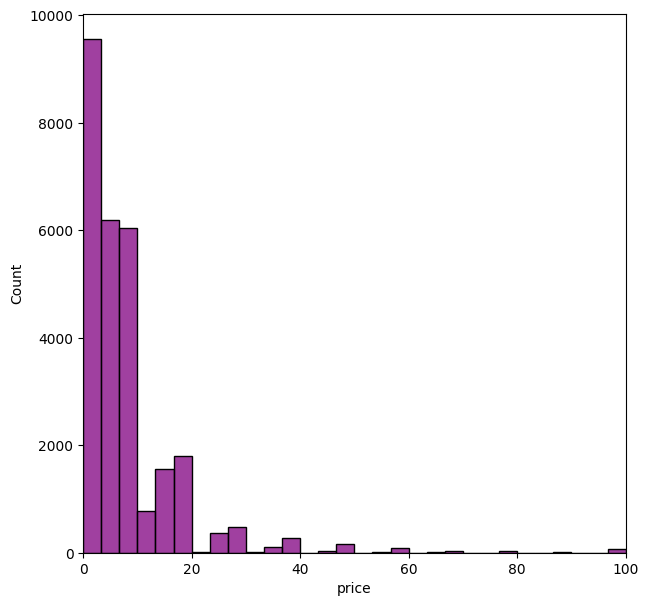

In [55]:
plt.figure(figsize=(7,7))
sns.color_palette("viridis", as_cmap=True)
sns.histplot(df_juegos[df_juegos['price']<100]['price'], bins=30, color='purple',)
plt.xlim(0,100);

Se verifica la media de la columna price por medio de la función 'nanmean', que ignora los valores NaN, es decir, valores numéricos inválidos o indefinidos. 

In [56]:
media_nan=np.nanmean(df_juegos['price'])
print(f'la media es de: {media_nan}')

la media es de: 9.010060384726641


Se procede a graficar el histograma considerando la media que se acaba de calcular

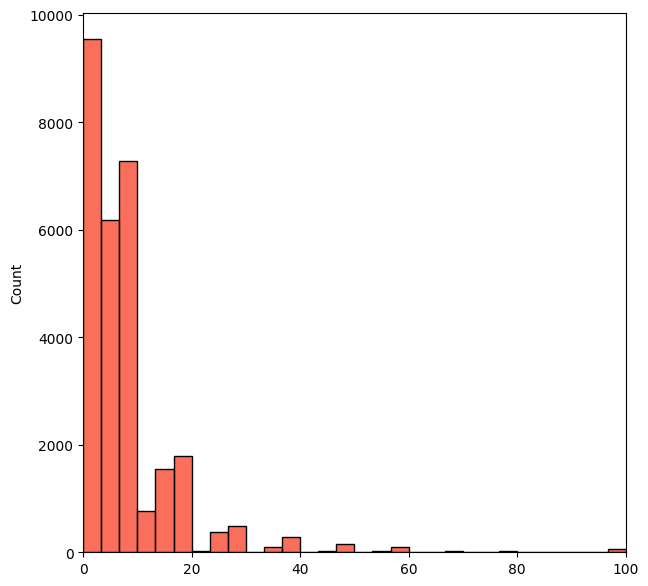

In [57]:
plt.figure(figsize=(7,7))
conmedia=np.where(df_juegos['price'].isna(), np.nanmean(df_juegos['price']),df_juegos['price'])
sns.histplot(conmedia[conmedia<100], bins=30, color= '#f93f26')
plt.xlim(0,100);

Ahora, verifico como afecta la imputación por mediana. Comienzo calculando la mediana sin considerar valores NaN con la función nanmedian y luego grafico para poder realizar comparación. 

In [58]:
mediana_nan=np.nanmedian(df_juegos['price'])
print (f'la mediana es de {mediana_nan}')

la mediana es de 4.99


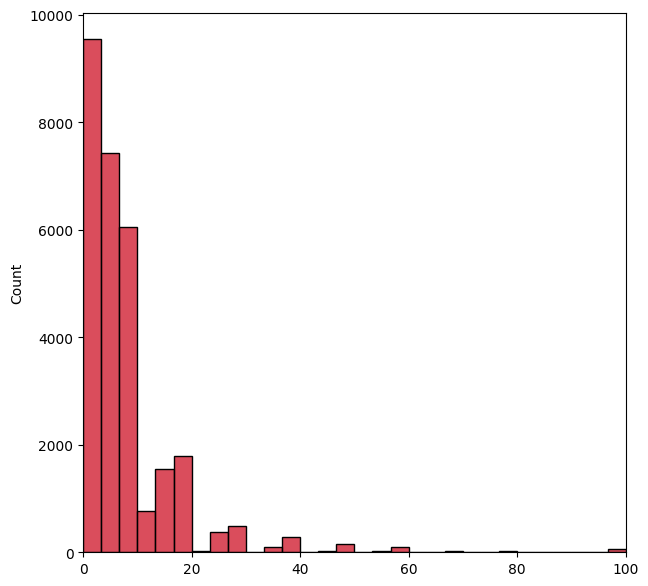

In [59]:
plt.figure(figsize=(7,7))
conmediana=np.where(df_juegos['price'].isna(), mediana_nan, df_juegos['price'])
sns.histplot(conmediana[conmediana<100], bins=30, color='#ce1126')
plt.xlim(0,100);

Se hace un subplot empleando el gráfico generado con media y el generado con mediana, para realizar una comparación visual eficaz

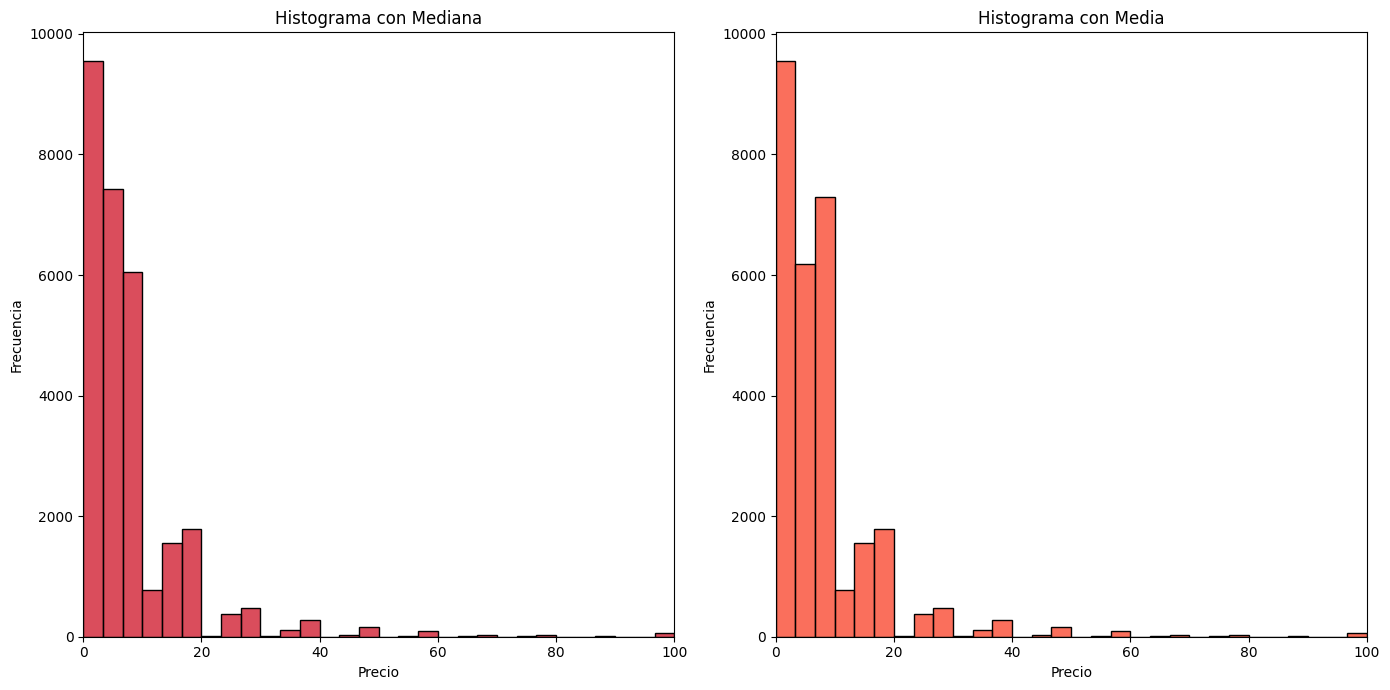

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
sns.histplot(conmediana[conmediana<100], bins=30, color='#ce1126', ax=axes[0])
axes[0].set_title('Histograma con Mediana')
axes[0].set_xlabel('Precio')
axes[0].set_ylabel('Frecuencia')
axes[0].set_xlim(0, 100)
sns.histplot(conmedia[conmedia<100], bins=30, color='#f93f26', ax=axes[1])
axes[1].set_title('Histograma con Media')
axes[1].set_xlabel('Precio')
axes[1].set_ylabel('Frecuencia')
axes[1].set_xlim(0, 100)
plt.tight_layout();


Es posible constatar que la imputación por mediana afecta menos a la forma de distribución de precios, ya que la mediana es menos sensible a los valores extremos. Se procede a imputar por mediana y se verifica la imputación.

In [61]:
df_juegos['price']=np.where(df_juegos['price'].isna(),conmediana, df_juegos['price'])
df_juegos['price'].isna().sum()

np.int64(0)

Se verifica la información del dataset actual y los valores nulos restantes.

In [62]:
df_juegos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28899 entries, 88310 to 120443
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        28733 non-null  object 
 1   app_name      28899 non-null  object 
 2   title         28899 non-null  object 
 3   id            28899 non-null  int64  
 4   release_date  28881 non-null  object 
 5   tags          28761 non-null  object 
 6   specs         28613 non-null  object 
 7   price         28899 non-null  float64
 8   early_access  28899 non-null  int64  
 9   developer     28899 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 2.4+ MB


In [63]:
df_juegos.isna().sum()*100/len(df_juegos)

genres          0.574414
app_name        0.000000
title           0.000000
id              0.000000
release_date    0.062286
tags            0.477525
specs           0.989654
price           0.000000
early_access    0.000000
developer       0.000000
dtype: float64

Se verifican los valores nulos y totales de la columna 'release_date'

In [64]:
df_juegos['release_date'].isna().sum()

np.int64(18)

In [65]:
for i in df_juegos['release_date'].value_counts().index:
    print(i)

2012-10-16
2017-08-31
2017-09-26
2017-07-25
2017-12-19
2017-12-15
2017-10-31
2016-09-29
2017-12-05
2017-10-17
2017-08-22
2017-06-20
2017-11-14
2017-09-14
2016-06-16
2015-12-09
2017-10-20
2017-09-12
2017-11-17
2017-12-12
2016-12-20
2017-08-29
2016-07-05
2017-04-03
2017-12-14
2017-12-21
2016-10-25
2017-03-28
2016-12-15
2016-12-16
2017-10-25
2017-04-26
2017-09-15
2016-10-04
2017-02-14
2017-02-21
2017-12-06
2017-10-05
2017-09-01
2016-10-03
2017-12-01
2016-11-15
2017-08-01
2017-11-07
2017-08-08
2017-09-19
2017-05-11
2017-08-03
2016-06-02
2017-11-09
2017-08-02
2016-11-03
2017-09-21
2017-10-24
2017-08-15
2017-10-13
2017-12-08
2017-07-07
2016-11-01
2016-12-07
2014-12-16
2017-03-10
2017-11-30
2016-04-26
2017-07-14
2017-11-20
2017-11-02
2016-07-12
2017-09-28
2017-04-18
2017-04-25
2017-10-03
2016-12-13
2017-10-26
2017-04-12
2017-12-20
2016-12-01
2017-10-30
2017-07-20
2016-10-27
2017-11-21
2017-07-13
2017-09-20
2017-02-10
2017-08-25
2017-01-31
2012-08-30
2017-02-01
2015-10-29
2016-06-03
2016-07-26

Se identifican valores que deben ser corregidos para ser transformados  a formato date. Se define una función para transformar los valores a fechas, empleando la librería dateutil.

In [66]:
from dateutil.parser import parse
def transformar_fechas(valor):
    if pd.isna(valor): 
        return pd.NaT
    try:
        return parse(valor)
    except ValueError:
        return pd.NaT  

In [67]:
df_juegos['release_date'] = df_juegos['release_date'].apply(transformar_fechas)
print(df_juegos)

                                                   genres  \
88310       [Action, Casual, Indie, Simulation, Strategy]   
88311                [Free to Play, Indie, RPG, Strategy]   
88312   [Casual, Free to Play, Indie, Simulation, Sports]   
88313                         [Action, Adventure, Casual]   
88315                     [Action, Adventure, Simulation]   
...                                                   ...   
120439                 [Action, Adventure, Casual, Indie]   
120440              [Casual, Indie, Simulation, Strategy]   
120441                          [Casual, Indie, Strategy]   
120442                        [Indie, Racing, Simulation]   
120443                                    [Casual, Indie]   

                        app_name                     title      id  \
88310        Lost Summoner Kitty       Lost Summoner Kitty  761140   
88311                  Ironbound                 Ironbound  643980   
88312    Real Pool 3D - Poolians   Real Pool 3D - Poolian

In [68]:
df_juegos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28899 entries, 88310 to 120443
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   genres        28733 non-null  object        
 1   app_name      28899 non-null  object        
 2   title         28899 non-null  object        
 3   id            28899 non-null  int64         
 4   release_date  28708 non-null  datetime64[ns]
 5   tags          28761 non-null  object        
 6   specs         28613 non-null  object        
 7   price         28899 non-null  float64       
 8   early_access  28899 non-null  int64         
 9   developer     28899 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 2.4+ MB


Ahora, se crea una nueva columna en la que se depositan las fechas corregidas y se verifica su creación

In [69]:
df_juegos['fecha_corregida']=df_juegos['release_date']

In [70]:
df_juegos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28899 entries, 88310 to 120443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   genres           28733 non-null  object        
 1   app_name         28899 non-null  object        
 2   title            28899 non-null  object        
 3   id               28899 non-null  int64         
 4   release_date     28708 non-null  datetime64[ns]
 5   tags             28761 non-null  object        
 6   specs            28613 non-null  object        
 7   price            28899 non-null  float64       
 8   early_access     28899 non-null  int64         
 9   developer        28899 non-null  object        
 10  fecha_corregida  28708 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(6)
memory usage: 2.6+ MB


In [71]:
print(df_juegos['fecha_corregida'])

88310    2018-01-04
88311    2018-01-04
88312    2017-07-24
88313    2017-12-07
88315    2018-01-04
            ...    
120439   2018-01-04
120440   2018-01-04
120441   2018-01-04
120442   2018-01-04
120443   2017-09-02
Name: fecha_corregida, Length: 28899, dtype: datetime64[ns]


In [72]:
for i in df_juegos['fecha_corregida'].value_counts().index:
    print(i)

2012-10-16 00:00:00
2017-08-31 00:00:00
2017-09-26 00:00:00
2017-07-25 00:00:00
2017-12-19 00:00:00
2017-10-31 00:00:00
2017-12-15 00:00:00
2017-10-13 00:00:00
2017-12-05 00:00:00
2016-09-29 00:00:00
2017-10-17 00:00:00
2017-08-22 00:00:00
2017-06-20 00:00:00
2017-11-14 00:00:00
2017-09-14 00:00:00
2016-06-16 00:00:00
2017-10-20 00:00:00
2015-12-09 00:00:00
2017-11-17 00:00:00
2017-12-12 00:00:00
2016-12-20 00:00:00
2017-09-12 00:00:00
2017-04-03 00:00:00
2016-07-05 00:00:00
2017-08-29 00:00:00
2017-12-21 00:00:00
2017-12-14 00:00:00
2017-03-28 00:00:00
2016-12-15 00:00:00
2016-10-25 00:00:00
2016-12-16 00:00:00
2017-10-25 00:00:00
2017-09-15 00:00:00
2016-10-04 00:00:00
2017-04-26 00:00:00
2017-02-21 00:00:00
2017-02-14 00:00:00
2017-10-05 00:00:00
2017-12-01 00:00:00
2016-10-03 00:00:00
2017-12-06 00:00:00
2017-09-01 00:00:00
2017-08-08 00:00:00
2017-08-01 00:00:00
2016-11-15 00:00:00
2017-05-11 00:00:00
2017-11-07 00:00:00
2017-09-19 00:00:00
2016-06-02 00:00:00
2017-11-09 00:00:00


Ahora, elimino la columna de fecha original, renombro la columna y verifico la cantidad de valores nulos presentes en la columna

In [73]:
df_juegos.drop(columns='release_date', inplace=True)

In [74]:
df_juegos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28899 entries, 88310 to 120443
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   genres           28733 non-null  object        
 1   app_name         28899 non-null  object        
 2   title            28899 non-null  object        
 3   id               28899 non-null  int64         
 4   tags             28761 non-null  object        
 5   specs            28613 non-null  object        
 6   price            28899 non-null  float64       
 7   early_access     28899 non-null  int64         
 8   developer        28899 non-null  object        
 9   fecha_corregida  28708 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 2.4+ MB


In [75]:
df_juegos.rename(columns={'fecha_corregida':'release_date'}, inplace=True)

In [76]:
df_juegos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28899 entries, 88310 to 120443
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   genres        28733 non-null  object        
 1   app_name      28899 non-null  object        
 2   title         28899 non-null  object        
 3   id            28899 non-null  int64         
 4   tags          28761 non-null  object        
 5   specs         28613 non-null  object        
 6   price         28899 non-null  float64       
 7   early_access  28899 non-null  int64         
 8   developer     28899 non-null  object        
 9   release_date  28708 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 2.4+ MB


In [77]:
df_juegos.isna().sum()*100/len(df_juegos)

genres          0.574414
app_name        0.000000
title           0.000000
id              0.000000
tags            0.477525
specs           0.989654
price           0.000000
early_access    0.000000
developer       0.000000
release_date    0.660923
dtype: float64

Identifico la moda de la fecha y reemplazo los valores nulos de 'release_date' con la moda de la fecha.

In [78]:
moda=df_juegos['release_date'].mode()[0]
print(moda)

2012-10-16 00:00:00


In [79]:
df_juegos['release_date']=df_juegos['release_date'].fillna(moda)
df_juegos.isna().sum()*100/len(df_juegos)

genres          0.574414
app_name        0.000000
title           0.000000
id              0.000000
tags            0.477525
specs           0.989654
price           0.000000
early_access    0.000000
developer       0.000000
release_date    0.000000
dtype: float64

Ahora, se observan los valores de las columnas 'genre' y 'tags'

In [80]:
df_juegos['genres']

88310         [Action, Casual, Indie, Simulation, Strategy]
88311                  [Free to Play, Indie, RPG, Strategy]
88312     [Casual, Free to Play, Indie, Simulation, Sports]
88313                           [Action, Adventure, Casual]
88315                       [Action, Adventure, Simulation]
                                ...                        
120439                   [Action, Adventure, Casual, Indie]
120440                [Casual, Indie, Simulation, Strategy]
120441                            [Casual, Indie, Strategy]
120442                          [Indie, Racing, Simulation]
120443                                      [Casual, Indie]
Name: genres, Length: 28899, dtype: object

In [81]:
df_juegos['tags']

88310         [Strategy, Action, Indie, Casual, Simulation]
88311     [Free to Play, Strategy, Indie, RPG, Card Game...
88312     [Free to Play, Simulation, Sports, Casual, Ind...
88313                           [Action, Adventure, Casual]
88315     [Action, Adventure, Simulation, FPS, Shooter, ...
                                ...                        
120439          [Action, Indie, Casual, Violent, Adventure]
120440                [Strategy, Indie, Casual, Simulation]
120441                            [Strategy, Indie, Casual]
120442                          [Indie, Simulation, Racing]
120443    [Indie, Casual, Puzzle, Singleplayer, Atmosphe...
Name: tags, Length: 28899, dtype: object

Considerando que las columnas observadas tienen información similar y compatible, se pueden emplear para completar los valores faltantes entre sí.

In [82]:
df_juegos['tags']=df_juegos.apply(lambda row:row['genres'] if row ['tags'] in vacio else row ['tags'], axis=1)
df_juegos['genres']=df_juegos.apply(lambda row:row['tags'] if row ['tags'] in vacio else row ['tags'], axis=1)
df_juegos.isna().sum()*100/len(df_juegos)

genres          0.394477
app_name        0.000000
title           0.000000
id              0.000000
tags            0.394477
specs           0.989654
price           0.000000
early_access    0.000000
developer       0.000000
release_date    0.000000
dtype: float64

Se visualizan las filas que no tienen género.

In [83]:
df_juegos[df_juegos['genres'].isna()]                     # vemos las filas que tienen género vacío

,genres,app_name,title,id,tags,specs,price,early_access,developer,release_date
88668,None,Europa Universalis III: Heir to the Throne,Europa Universalis III: Heir to the Throne,25806,None,"[Single-player, Multi-player, Downloadable Con...",9.99,25806,Paradox Interactive,2009-12-15
88779,None,Booster Trooper Demo,Booster Trooper Demo,27930,None,[Game demo],4.99,27930,DnS Development,2010-08-31
88922,None,"Warhammer 40,000: Dawn of War II - Retribution...","Warhammer 40,000: Dawn of War II - Retribution...",56436,None,[Downloadable Content],0.99,56436,"Relic Entertainment,Feral Interactive (Mac/Linux)",2011-02-28
89089,None,Dungeon Defenders Halloween Costume Pack,Dungeon Defenders Halloween Costume Pack,202520,None,[Downloadable Content],0.99,202520,Trendy Entertainment,2011-11-11
89090,None,Dungeon Defenders Capture the Flag Pre-Alpha P...,Dungeon Defenders Capture the Flag Pre-Alpha P...,202523,None,[Downloadable Content],4.99,202523,Trendy Entertainment,2011-11-11
...,...,...,...,...,...,...,...,...,...,...
119491,None,Total War: SHOGUN 2 - Sengoku Jidai Unit Pack,Total War: SHOGUN 2 - Sengoku Jidai Unit Pack,34342,None,[Downloadable Content],2.99,34342,"The Creative Assembly,Feral Interactive (Mac),...",2011-07-28
119572,None,"Worms Reloaded: The ""Pre-order Forts and Hats""...","Worms Reloaded: The ""Pre-order Forts and Hats""...",22630,None,[Downloadable Content],1.99,22630,Team17 Digital Ltd,2011-05-17
119583,None,Total War: SHOGUN 2 - The Ikko Ikki Clan Pack,Total War: SHOGUN 2 - The Ikko Ikki Clan Pack,34348,None,[Downloadable Content],4.99,34348,"The Creative Assembly,Feral Interactive (Mac),...",2011-05-26
119634,None,"Killing Floor ""London's Finest"" Character Pack","Killing Floor ""London's Finest"" Character Pack",35419,None,[Downloadable Content],7.99,35419,Tripwire Interactive,2010-12-14


Crearé tres archivos por separado. Uno con los géneros, otro con la columna 'specs' y otro con los tags asociados a cada videojuego.

In [84]:
df_generos=df_juegos.explode('genres').reset_index(drop=True)
df_tags=df_juegos.explode('tags').reset_index(drop=True)
df_spec=df_juegos.explode ('specs').reset_index(drop=True)

In [85]:
print(df_spec)

                                                   genres  \
0           [Strategy, Action, Indie, Casual, Simulation]   
1       [Free to Play, Strategy, Indie, RPG, Card Game...   
2       [Free to Play, Strategy, Indie, RPG, Card Game...   
3       [Free to Play, Strategy, Indie, RPG, Card Game...   
4       [Free to Play, Strategy, Indie, RPG, Card Game...   
...                                                   ...   
127778                        [Indie, Simulation, Racing]   
127779                        [Indie, Simulation, Racing]   
127780  [Indie, Casual, Puzzle, Singleplayer, Atmosphe...   
127781  [Indie, Casual, Puzzle, Singleplayer, Atmosphe...   
127782  [Indie, Casual, Puzzle, Singleplayer, Atmosphe...   

                   app_name                title      id  \
0       Lost Summoner Kitty  Lost Summoner Kitty  761140   
1                 Ironbound            Ironbound  643980   
2                 Ironbound            Ironbound  643980   
3                 Ironbound

### Decidiendo entre CSV y Parquet
* **CSV:**
  * **Pequeños conjuntos de datos:** Para datasets pequeños o medianos, CSV puede ser una opción adecuada debido a su simplicidad.
  * **Exploración de datos inicial:** Es útil para explorar y visualizar datos rápidamente.
  * **Intercambio de datos:** Es un formato común para compartir datos entre diferentes herramientas y plataformas.
* **Parquet:**
  * **Grandes conjuntos de datos:** Para datasets muy grandes, Parquet ofrece un mejor rendimiento y eficiencia de almacenamiento.
  * **Análisis iterativo:** Si vas a realizar múltiples consultas y análisis sobre el mismo dataset, Parquet puede acelerar significativamente el proceso.
  * **Machine learning a gran escala:** Es ideal para entrenar modelos de machine learning en grandes cantidades de datos.
### Resumen
| Característica | CSV | Parquet |
|---|---|---|
| Simplicidad | Alta | Baja |
| Rendimiento para grandes datasets | Bajo | Alto |
| Compresión | No | Sí |
| Esquemas | No | Sí |
| Uso común | Amplio | Específico para big data |

Se importa la librería necesaria para exportar los dataframes a parquet

In [86]:
import pyarrow

In [87]:
df_generos.to_parquet('generos.parquet')

In [88]:
df_tags.to_parquet('tags.parquet')
df_spec.to_parquet('spec.parquet')

In [89]:
df_generos.head()

,genres,app_name,title,id,tags,specs,price,early_access,developer,release_date
0,Strategy,Lost Summoner Kitty,Lost Summoner Kitty,761140,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],4.99,761140,Kotoshiro,2018-01-04
1,Action,Lost Summoner Kitty,Lost Summoner Kitty,761140,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],4.99,761140,Kotoshiro,2018-01-04
2,Indie,Lost Summoner Kitty,Lost Summoner Kitty,761140,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],4.99,761140,Kotoshiro,2018-01-04
3,Casual,Lost Summoner Kitty,Lost Summoner Kitty,761140,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],4.99,761140,Kotoshiro,2018-01-04
4,Simulation,Lost Summoner Kitty,Lost Summoner Kitty,761140,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],4.99,761140,Kotoshiro,2018-01-04


Se generan las variables dummies para géneros de videojuegos. 1 es que está en ese género, 0 es que no. 

In [90]:
df_amplio=df_juegos['genres'].explode().reset_index(drop=True)
df_dummies = pd.get_dummies(df_amplio, prefix='genre').astype(int)
df = pd.concat([df_amplio, df_dummies], axis=1)
df.drop('genres', axis=1, inplace=True)
df.head()

,genre_1980s,genre_1990's,genre_2.5D,genre_2D,genre_2D Fighter,genre_3D Platformer,genre_3D Vision,genre_4 Player Local,genre_4X,genre_6DOF,...,genre_Warhammer 40K,genre_Web Publishing,genre_Werewolves,genre_Western,genre_Word Game,genre_World War I,genre_World War II,genre_Wrestling,genre_Zombies,genre_e-sports
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Se generan las variables dummies para las especificaciones de cada videojuego. 1 es que está en esa especificación, 0 es que no. 

In [98]:
df_amplio=df_juegos['specs'].explode().reset_index(drop=True)
df_dummies = pd.get_dummies(df_amplio, prefix='spec').astype(int)
df = pd.concat([df, df_dummies], axis=1)
df.head()

,genre_1980s,genre_1990's,genre_2.5D,genre_2D,genre_2D Fighter,genre_3D Platformer,genre_3D Vision,genre_4 Player Local,genre_4X,genre_6DOF,...,spec_Single-player,spec_Stats,spec_Steam Achievements,spec_Steam Cloud,spec_Steam Leaderboards,spec_Steam Trading Cards,spec_Steam Turn Notifications,spec_Steam Workshop,spec_SteamVR Collectibles,spec_Valve Anti-Cheat enabled
0,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Se generan las variables dummies para los tags de cada videojuego. 1 es que está en ese tag, 0 es que no. 

In [99]:
df_amplio=df_juegos['tags'].explode().reset_index(drop=True)
df_dummies = pd.get_dummies(df_amplio, prefix='tag').astype(int)
df = pd.concat([df, df_dummies], axis=1)
df.head()

,genre_1980s,genre_1990's,genre_2.5D,genre_2D,genre_2D Fighter,genre_3D Platformer,genre_3D Vision,genre_4 Player Local,genre_4X,genre_6DOF,...,tag_Warhammer 40K,tag_Web Publishing,tag_Werewolves,tag_Western,tag_Word Game,tag_World War I,tag_World War II,tag_Wrestling,tag_Zombies,tag_e-sports
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Se guarda el dataframe como df_dummies y se procede a agregar las columnas necesarias de df_juegos

In [102]:
df_dummies=df

In [104]:
df_dummies.head()

,genre_1980s,genre_1990's,genre_2.5D,genre_2D,genre_2D Fighter,genre_3D Platformer,genre_3D Vision,genre_4 Player Local,genre_4X,genre_6DOF,...,tag_Warhammer 40K,tag_Web Publishing,tag_Werewolves,tag_Western,tag_Word Game,tag_World War I,tag_World War II,tag_Wrestling,tag_Zombies,tag_e-sports
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
df_juegos.head(4)

,genres,app_name,title,id,tags,specs,price,early_access,developer,release_date
88310,"[Strategy, Action, Indie, Casual, Simulation]",Lost Summoner Kitty,Lost Summoner Kitty,761140,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],4.99,761140,Kotoshiro,2018-01-04
88311,"[Free to Play, Strategy, Indie, RPG, Card Game...",Ironbound,Ironbound,643980,"[Free to Play, Strategy, Indie, RPG, Card Game...","[Single-player, Multi-player, Online Multi-Pla...",0.00,643980,Secret Level SRL,2018-01-04
88312,"[Free to Play, Simulation, Sports, Casual, Ind...",Real Pool 3D - Poolians,Real Pool 3D - Poolians,670290,"[Free to Play, Simulation, Sports, Casual, Ind...","[Single-player, Multi-player, Online Multi-Pla...",0.00,670290,Poolians.com,2017-07-24
88313,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,767400,"[Action, Adventure, Casual]",[Single-player],0.99,767400,彼岸领域,2017-12-07


In [101]:
df_juegos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28899 entries, 88310 to 120443
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   genres        28785 non-null  object        
 1   app_name      28899 non-null  object        
 2   title         28899 non-null  object        
 3   id            28899 non-null  int64         
 4   tags          28785 non-null  object        
 5   specs         28613 non-null  object        
 6   price         28899 non-null  float64       
 7   early_access  28899 non-null  int64         
 8   developer     28899 non-null  object        
 9   release_date  28899 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 2.4+ MB


In [125]:
columnas_a_guardar= ['app_name', 'title', 'id', 'price', 'early_access','developer','release_date']

In [126]:
df_slice = df_juegos[columnas_a_guardar]

In [130]:
early=['early_access']

In [131]:
df_early=df_slice[early]

In [132]:
df_slice.head()

,app_name,title,id,price,early_access,developer,release_date
88310,Lost Summoner Kitty,Lost Summoner Kitty,761140,4.99,761140,Kotoshiro,2018-01-04
88311,Ironbound,Ironbound,643980,0.00,643980,Secret Level SRL,2018-01-04
88312,Real Pool 3D - Poolians,Real Pool 3D - Poolians,670290,0.00,670290,Poolians.com,2017-07-24
88313,弹炸人2222,弹炸人2222,767400,0.99,767400,彼岸领域,2017-12-07
88315,Battle Royale Trainer,Battle Royale Trainer,772540,3.99,772540,Trickjump Games Ltd,2018-01-04


In [ ]:
dfcondummies = pd.concat([df_slice, df_dummies], axis=1)

In [129]:
dfcondummies.head()

,app_name,title,id,price,developer,release_date,genre_1980s,genre_1990's,genre_2.5D,genre_2D,...,tag_Warhammer 40K,tag_Web Publishing,tag_Werewolves,tag_Western,tag_Word Game,tag_World War I,tag_World War II,tag_Wrestling,tag_Zombies,tag_e-sports
88310,Lost Summoner Kitty,Lost Summoner Kitty,761140.0,4.99,Kotoshiro,2018-01-04,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88311,Ironbound,Ironbound,643980.0,0.00,Secret Level SRL,2018-01-04,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88312,Real Pool 3D - Poolians,Real Pool 3D - Poolians,670290.0,0.00,Poolians.com,2017-07-24,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88313,弹炸人2222,弹炸人2222,767400.0,0.99,彼岸领域,2017-12-07,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
88315,Battle Royale Trainer,Battle Royale Trainer,772540.0,3.99,Trickjump Games Ltd,2018-01-04,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
dfcondummies=pd.concat([df_slice, df_dummies], axis=1)

In [139]:
dfcondummies.head(20)

,app_name,title,id,price,early_access,developer,release_date,genre_1980s,genre_1990's,genre_2.5D,...,tag_Warhammer 40K,tag_Web Publishing,tag_Werewolves,tag_Western,tag_Word Game,tag_World War I,tag_World War II,tag_Wrestling,tag_Zombies,tag_e-sports
88310,Lost Summoner Kitty,Lost Summoner Kitty,761140.0,4.99,761140.0,Kotoshiro,2018-01-04,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88311,Ironbound,Ironbound,643980.0,0.00,643980.0,Secret Level SRL,2018-01-04,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88312,Real Pool 3D - Poolians,Real Pool 3D - Poolians,670290.0,0.00,670290.0,Poolians.com,2017-07-24,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88313,弹炸人2222,弹炸人2222,767400.0,0.99,767400.0,彼岸领域,2017-12-07,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88315,Battle Royale Trainer,Battle Royale Trainer,772540.0,3.99,772540.0,Trickjump Games Ltd,2018-01-04,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88316,SNOW - All Access Basic Pass,SNOW - All Access Basic Pass,774276.0,9.99,774276.0,Poppermost Productions,2018-01-04,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88317,SNOW - All Access Pro Pass,SNOW - All Access Pro Pass,774277.0,18.99,774277.0,Poppermost Productions,2018-01-04,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88318,SNOW - All Access Legend Pass,SNOW - All Access Legend Pass,774278.0,29.99,774278.0,Poppermost Productions,2018-01-04,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88319,Race,Race,768800.0,4.99,768800.0,RewindApp,2018-01-04,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88320,Uncanny Islands,Uncanny Islands,768570.0,4.99,768570.0,Qucheza,2012-10-16,0,0,0,...,0,0,0,0,0,0,0,0,0,0


El dataframe actual es dfcondummies. Se hace una búsqueda para verificar si está funcionando correctamente el dataframe

In [140]:
dfcondummies[dfcondummies['id'] == 768880.0]

,app_name,title,id,price,early_access,developer,release_date,genre_1980s,genre_1990's,genre_2.5D,...,tag_Warhammer 40K,tag_Web Publishing,tag_Werewolves,tag_Western,tag_Word Game,tag_World War I,tag_World War II,tag_Wrestling,tag_Zombies,tag_e-sports
88323,Beach Rules,Beach Rules,768880.0,3.99,768880.0,Copperpick Studio,2018-01-04,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [142]:
dfcondummies[dfcondummies['id'] == 761140.0]['genre_Action'] 

88310    0
Name: genre_Action, dtype: int64

In [149]:
print(dfcondummies[dfcondummies.duplicated()])

Empty DataFrame
Columns: [app_name, title, id, price, early_access, developer, release_date, genre_1980s, genre_1990's, genre_2.5D, genre_2D, genre_2D Fighter, genre_3D Platformer, genre_3D Vision, genre_4 Player Local, genre_4X, genre_6DOF, genre_Abstract, genre_Accounting, genre_Action, genre_Action RPG, genre_Action-Adventure, genre_Adventure, genre_Agriculture, genre_Aliens, genre_Alternate History, genre_America, genre_Animation & Modeling, genre_Anime, genre_Arcade, genre_Arena Shooter, genre_Artificial Intelligence, genre_Assassin, genre_Asynchronous Multiplayer, genre_Atmospheric, genre_Audio Production, genre_Base Building, genre_Based On A Novel, genre_Basketball, genre_Batman, genre_Beat 'em up, genre_Benchmark, genre_Blood, genre_Board Game, genre_Bowling, genre_Building, genre_Bullet Hell, genre_Bullet Time, genre_CRPG, genre_Capitalism, genre_Card Game, genre_Cartoon, genre_Cartoony, genre_Casual, genre_Character Action Game, genre_Character Customization, genre_Chess, ge

Elimino los valores duplicados y nulos empleando como guia la columna ID

In [148]:
dfcondummies.duplicated(subset= 'id').sum()   

np.int64(0)

In [147]:
dfcondummies.drop_duplicates(subset='id',inplace=True)

In [153]:
dfcondummies.dropna(subset='id',inplace=True)

In [151]:
dfcondummies.tail()

,app_name,title,id,price,early_access,developer,release_date,genre_1980s,genre_1990's,genre_2.5D,...,tag_Warhammer 40K,tag_Web Publishing,tag_Werewolves,tag_Western,tag_Word Game,tag_World War I,tag_World War II,tag_Wrestling,tag_Zombies,tag_e-sports
120440,Colony On Mars,Colony On Mars,773640.0,1.99,773640.0,"Nikita ""Ghost_RUS""",2018-01-04,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120441,LOGistICAL: South Africa,LOGistICAL: South Africa,733530.0,4.99,733530.0,Sacada,2018-01-04,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120442,Russian Roads,Russian Roads,610660.0,1.99,610660.0,Laush Dmitriy Sergeevich,2018-01-04,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120443,EXIT 2 - Directions,EXIT 2 - Directions,658870.0,4.99,658870.0,"xropi,stev3ns",2017-09-02,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,NaN,NaN,NaN,NaN,NaN,NaN,NaT,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [161]:
dfcondummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28899 entries, 88310 to 120443
Columns: 1142 entries, app_name to tag_e-sports
dtypes: datetime64[ns](1), float64(127), int64(1011), object(3)
memory usage: 252.0+ MB


Se guarda el dataframe dfcondummies y se exporta a parquet

In [166]:
dfcondummies.to_csv('etljuegoslimpio.csv') 

In [167]:
df = pd.read_csv('etljuegoslimpio.csv')

In [168]:
df.to_parquet('etljuegoslimpio.parquet')